# GA Data Science 16 (DAT16) - Lab6

### Regressions

by Justin Breucop, adapted from Francesco Mosconi & Craig Sakuma


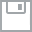
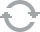
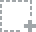
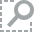
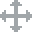
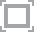
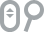
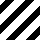
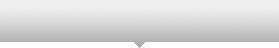
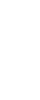
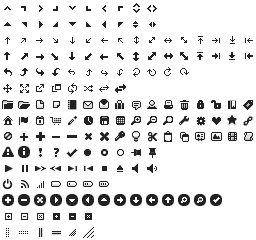
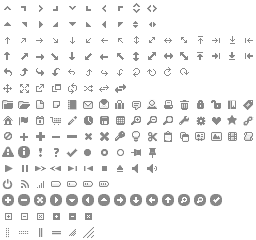
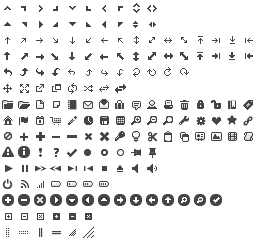
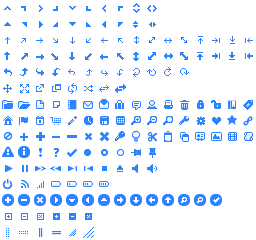
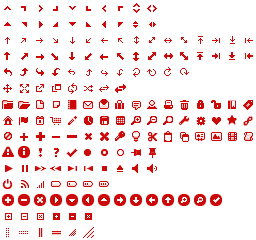
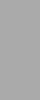
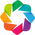
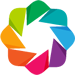

In [2]:
#usual imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
output_notebook()

%matplotlib inline

# Statsmodel APIs
import statsmodels.api as sm

## Linear Regression

Load a subset of the housing data

In [3]:
data = pd.read_csv('../data/housing-data.csv')

In [4]:
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [5]:
data_n = pd.DataFrame()
for col in data.columns:
    data_n[col] = data[col].apply(lambda x: float(x)/(10**(len(str(data[col].max()))-1)) )
data_n.head()

,sqft,bdrms,age,price
0,2.104,3,7.0,3.999
1,1.600,3,2.8,3.299
2,2.400,3,4.4,3.690
3,1.416,2,4.9,2.320
4,3.000,4,7.5,5.399


The dataset contains 4 columns. Our objective is to build a model that is able to predict the price of a house, using the information contained in the other columns (sqft, bedrooms and age)

/Users/yomit/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


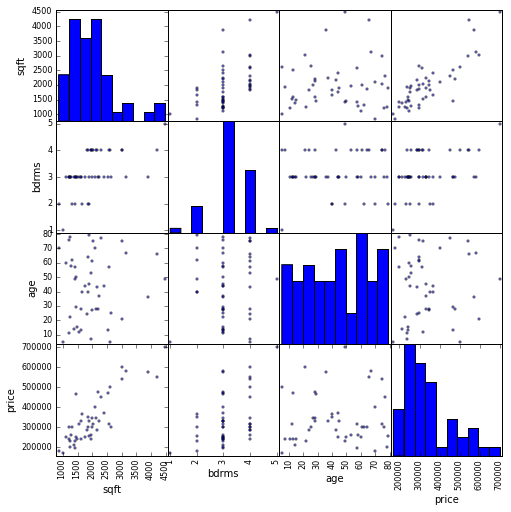

In [6]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (8,8))

Run 1. x = sqft, data is raw (so graph units are nice right)

Let''s start with a simple model that uses the house surface to estimate the price

In [7]:
x = data['sqft'].values
y = data['price'].values

print type(x)

<type 'numpy.ndarray'>


In [8]:
results = sm.OLS(y, x).fit()
slope = results.params[0]
r2 = results.rsquared
print slope
print r2

165.383217896
0.96344245878


A little math terminology refresher: slope is the steepness of the line and the r squared value is a "goodness of fit" measure. It tells how much of the variability of our y & x is explained by our model. 0 is bad, 95% is good and 100% is suspect (always be wary of perfect scores).

In [9]:
# Here we'll build the chart for the graph

p = figure(title='Loop')
p.circle(x,y,color="blue",size=8)

x1 = range(min(x),max(x)+1)

# For loop:
y1 = []
for val in x1:
    y1.append(slope*val)

p.line(x1,y1,color='red')

show(p)

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1212.
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           1.06e-34
Time:                        14:40:55   Log-Likelihood:                -590.53
No. Observations:                  47   AIC:                             1183.
Df Residuals:                      46   BIC:                             1185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           165.3832      4.750     34.818      0.000       155.822   174.944
==============================================================================
Omnibus:                        2.482   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.600
Skew:                           0.183   Prob(JB):                        0.449
Kurtosis:                       3.826   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

But we don't have a y intercept, which means the line passes through 0,0 as a requirement. This works for certain models but maybe not for others. 

`sm.add_constant` adds a column of ones to allow for finding an intercept to your data.

In [11]:
X = sm.add_constant(x, prepend=True)

In [12]:
results = sm.OLS(y, X).fit()
intercept, slope = results.params

r2 = results.rsquared

print intercept,slope
print r2

71270.4924487 134.52528772
0.731003783976


In [13]:

p = figure(title='Price vs Sqft')
p.circle(x,y,color="blue",size=8)

x1 = range(min(x),max(x)+1)

# For loop:
y1 = []
for val in x1:
    y1.append(intercept + slope*val)
# This generates y1 again, but with one line of code instead
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')

show(p)

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     122.3
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           2.03e-14
Time:                        14:40:55   Log-Likelihood:                -586.94
No. Observations:                  47   AIC:                             1178.
Df Residuals:                      45   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7.127e+04   2.61e+04      2.725      0.009      1.86e+04  1.24e+05
x1           134.5253     12.165     11.058      0.000       110.024   159.027
==============================================================================
Omnibus:                        3.751   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.726
Skew:                           0.557   Prob(JB):                        0.256
Kurtosis:                       3.390   Cond. No.                     5.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EXERCISE #1
#### Create the linear model for data_n to predict price based on age. 
#### What are the slope, intercept and r-squared?

In [15]:
x = data_n['age'].values
y = data_n['price'].values

#### Plot the data along with the line for the regression model

In [16]:
model = sm.OLS(y, x).fit()
slope = model.params[0]
r2 = model.rsquared

print slope
print r2


p = figure(title='Age v Price 1')
p.circle(x,y,color="blue",size=8)

x1 = range(int(min(x)),int(max(x))+5)

y1 = []
for a in x1:
    y1.append(slope*a)

p.line(x1,y1,color='red')

show(p)

model.summary()

0.628248679746
0.703796523369


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     109.3
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           9.71e-14
Time:                        14:40:55   Log-Likelihood:                -98.587
No. Observations:                  47   AIC:                             199.2
Df Residuals:                      46   BIC:                             201.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6282      0.060     10.455      0.000         0.507     0.749
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.601
Skew:                           0.168   Prob(JB):                        0.740
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = sm.add_constant(x, prepend=True)
model2 = sm.OLS(y, X).fit()
intercept, slope = model2.params
r2 = model2.rsquared
print intercept,slope
print r2

3.28310755434 0.0283120704135
0.0026823102022


In [22]:
p = figure(title='Price vs Age 2')
p.circle(x,y,color="blue",size=8)

x1 = range(int(min(x)),int(max(x)+1))

# For loop:
'''y1 = []
for val in x1:
    y1.append(intercept + slope*val)
# This generates y1 again, but with one line of code instead'''
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')

show(p)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     109.3
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           9.71e-14
Time:                        14:41:56   Log-Likelihood:                -98.587
No. Observations:                  47   AIC:                             199.2
Df Residuals:                      46   BIC:                             201.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6282      0.060     10.455      0.000         0.507     0.749
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.601
Skew:                           0.168   Prob(JB):                        0.740
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Bonus challenge: Change the color and shape of the data points.

In [24]:
p.circle(x,y,color="green",size=8)
show(p)

Confidence Intervals

Something to entertain you, definitely not necessary but fun to know a short cut.

In [25]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(results)

In [26]:

p2 = figure(title="Confidence Intervals for Price to Sqft")
p2.circle(x, y,size=4)
p2.line(x, results.fittedvalues, color='red',line_width=4)
p2.line(x, iv_u, color='red',line_width=2)
p2.line(x, iv_l, color='red',line_width=2)

show(p2)

## Function of Bedrooms?

Run 3:  x = bdrms, data is raw (so graph units are nice)

In [27]:
x = data['bdrms'].values
y = data['price'].values

X = sm.add_constant(x, prepend=True)
results = sm.OLS(y, X).fit()
intercept, slope = results.params

r2 = results.rsquared

p = figure(title='Price vs Bedrooms')
p.circle(x,y,color="blue",size=8)

x1 = range(min(x),max(x)+1)

# For loop:
y1 = []
for val in x1:
    y1.append(intercept + slope*val)
    
# This generates y1 again, but with one line of code instead
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')

show(p)

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     10.94
Date:                Fri, 08 Jan 2016   Prob (F-statistic):            0.00185
Time:                        14:41:56   Log-Likelihood:                -612.68
No. Observations:                  47   AIC:                             1229.
Df Residuals:                      45   BIC:                             1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         1.1e+05   7.16e+04      1.537      0.131     -3.41e+04  2.54e+05
x1          7.267e+04    2.2e+04      3.308      0.002      2.84e+04  1.17e+05
==============================================================================
Omnibus:                        4.709   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.412
Skew:                           0.691   Prob(JB):                        0.110
Kurtosis:                       2.413   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x = data_n['bdrms'].values
y = data_n['price'].values

X = sm.add_constant(x, prepend=True)
results = sm.OLS(y, X).fit()
intercept, slope = results.params
r2 = results.rsquared

p = figure(title='Price vs bdrms')
p.circle(x,y,color="blue",size=8)

x1 = range(int(min(x)),int(max(x)+1))
# For loop:
y1 = []
for val in x1:
    y1.append(intercept + slope*val)
# This generates y1 again, but with one line of code instead
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')
show(p)

In [30]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     10.94
Date:                Fri, 08 Jan 2016   Prob (F-statistic):            0.00185
Time:                        14:41:56   Log-Likelihood:                -71.573
No. Observations:                  47   AIC:                             147.1
Df Residuals:                      45   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1003      0.716      1.537      0.1

In [31]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     10.94
Date:                Fri, 08 Jan 2016   Prob (F-statistic):            0.00185
Time:                        14:41:56   Log-Likelihood:                -71.573
No. Observations:                  47   AIC:                             147.1
Df Residuals:                      45   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1003      0.716      1.537      0.1

## Function of multiple variables

In [32]:
x = data_n[['sqft', 'bdrms','age']].values
y = data_n['price'].values

X = sm.add_constant(x, prepend=True)
results = sm.OLS(y, X).fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     39.38
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           2.12e-12
Time:                        14:41:56   Log-Likelihood:                -45.641
No. Observations:                  47   AIC:                             99.28
Df Residuals:                      43   BIC:                             106.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9245      0.449      2.060      0.045         0.019     1.830
x1             1.3933      0.150      9.305      0.000         1.091     1.695
x2            -0.0862      0.156     -0.551      0.584        -0.402     0.229
x3            -0.0081      0.043     -0.188      0.852        -0.095     0.079
==============================================================================
Omnibus:                        3.841   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.771
Skew:                           0.552   Prob(JB):                        0.250
Kurtosis:                       3.444   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Just sqft & bedrooms

In [34]:
x = data_n[['sqft', 'bdrms']].values
y = data_n['price'].values
X = sm.add_constant(x, prepend=True)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           2.43e-13
Time:                        14:41:56   Log-Likelihood:                -45.660
No. Observations:                  47   AIC:                             97.32
Df Residuals:                      44   BIC:                             102.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8960      0.418      2.145      0.037         0.054     1.738
x1             1.3921      0.148      9.409      0.000         1.094     1.690
x2            -0.0874      0.155     -0.566      0.575        -0.399     0.224
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The formula API

In [35]:
import statsmodels.formula.api as smf

In [36]:
type(data)

pandas.core.frame.DataFrame

In [37]:
results = smf.ols('price ~ sqft + bdrms', data=data).fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           2.43e-13
Time:                        14:41:56   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    8.96e+04   4.18e+04      2.145      0.037      5421.208  1.74e+05
sqft         139.2107     14.795      9.409      0.000       109.393   169.028
bdrms      -8738.0191   1.55e+04     -0.566      0.575     -3.99e+04  2.24e+04
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Nonlinear Fitting

Let's generate points with an arbitrary nonlinear function

$y = \frac{1}{2} x + \frac{1}{2} \sin{x} - \frac{1}{50} (x-5)^2 + 5$

Note: np.c\_ is shorthand in numpy for combining columns

In [39]:
# start with some fake data
nsample = 50
sig = 0.5
# generate linear space
x = np.linspace(0, 20, nsample)
# invent function
X = np.c_[x, np.sin(x), (x - 5)**2, np.ones(nsample)]
# invent coefficients
beta = [1.5, 2.5, -0.2, 15.]
# generate |
y_true = np.dot(X, beta)
# add noise
y = y_true + sig * np.random.normal(size=nsample)

In [40]:
X = np.c_[x, np.sin(x), (x - 5)**2, np.ones(nsample)]
X.shape
x.shape
y_true.shape

(50,)

In [41]:
np.random.normal(size=nsample)

array([-0.18273462, -0.44353118, -0.38321656,  0.29797401, -1.93500772,
        0.80058792,  0.50114085, -0.47892489, -0.95737224,  0.30398604,
       -0.93544221,  0.68876129,  1.13089457, -0.63781503,  0.13809594,
       -1.41834876, -0.6300456 , -0.28514449, -1.33226256, -2.99814709,
       -0.79008126, -0.10030848, -0.84017423, -2.0381353 , -0.68786398,
        0.04547545,  1.36871086, -2.00277677, -0.47087218, -0.03477705,
       -0.73696934, -1.83905108,  0.78388153, -0.33692381, -1.21629381,
       -0.6228067 ,  1.39535088, -0.41492843,  1.75876924, -2.29010986,
       -0.08082716,  1.21740445, -1.20300123, -0.89119674,  0.29587695,
       -2.34884339,  0.14747612, -0.0525426 ,  0.44838484,  0.45483851])

quick look at the data

In [42]:
p = figure()
p.line(x, y_true,line_color='blue')
p.circle(x, y, color='green')
show(p)

In [43]:
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2571.
Date:                Fri, 08 Jan 2016   Prob (F-statistic):           3.29e-51
Time:                        14:41:56   Log-Likelihood:                -38.823
No. Observations:                  50   AIC:                             85.65
Df Residuals:                      46   BIC:                             93.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4373      0.029     49.859      0.000         1.379     1.495
x2             2.5462      0.113     22.469      0.000         2.318     2.774
x3            -0.1942      0.003    -76.725      0.000        -0.199    -0.189
const         15.2583      0.187     81.634      0.000        14.882    15.635
==============================================================================
Omnibus:                        1.388   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.396
Skew:                           0.344   Prob(JB):                        0.498
Kurtosis:                       2.556   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I can access the results attributes

In [44]:
print res.params

[  1.43725609   2.54617116  -0.19418989  15.2583037 ]


In [45]:
print 
res.bse

array([ 0.02882638,  0.11331989,  0.00253098,  0.18691134])

In [46]:
print res.predict()

[ 10.40355635  12.76108862  14.88787311  16.64514575  17.94422168
  18.76106594  19.14024237  19.18759186  19.05284301  18.90501214
  18.90463439  19.17738824  19.79344692  20.75594911  22.00048329
  23.40567035  24.81310587  26.05338546  26.97393749  27.46409011
  27.47325438  27.01923586  26.1853092   25.10653636  23.94757633
  22.8756321   22.03297968  21.51359258  21.3477022   21.49683092
  21.86011384  22.29087061  22.62070462  22.68717003  22.36046122
  21.56473945  20.29059296  18.59658331  16.59962385  14.45577121
  12.33458565  10.39127276   8.74118362   7.44086298   6.47875909
   5.7771216    5.20477579   4.59867412   3.79068455   2.63521411]


Let's look at the fit!

In [47]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, color='blue')
p.line(x, y_true, color='blue',line_width = 3)

prstd, iv_l, iv_u = wls_prediction_std(res)

p.line(x, res.fittedvalues, line_color= 'red', line_dash='dashed',line_width = 3)
p.line(x, iv_u, line_color= 'red', line_dash='dashed')
p.line(x, iv_l, line_color= 'red', line_dash='dashed')
show(p)

## Overfitting

In [48]:
x = np.array([-0.99768, -0.69574, -0.40373, -0.10236, 0.22024, 0.47742, 0.82229,1.20044])
y = np.array([2.0885, 1.1646, 0.3287, 0.46013, 0.44808, 0.10013, -0.32952, -0.32811])

p = figure()
p.circle(x, y, size=8,color='blue')
show(p)

np.vander yields a vandermonde matrix (fancy way of doing columns of x, x^2, x^3 etc. up to the second argument)

In [49]:
# X = np.c_[x, np.ones(len(x))]
X = np.vander(x, 2)
# Same as np.c_[x]

In [50]:
X

array([[-0.99768,  1.     ],
       [-0.69574,  1.     ],
       [-0.40373,  1.     ],
       [-0.10236,  1.     ],
       [ 0.22024,  1.     ],
       [ 0.47742,  1.     ],
       [ 0.82229,  1.     ],
       [ 1.20044,  1.     ]])

In [51]:
res = sm.OLS(y, X).fit()
res.summary()

/Users/yomit/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 08 Jan 2016   Prob (F-statistic):            0.00216
Time:                        14:41:56   Log-Likelihood:                -2.3435
No. Observations:                   8   AIC:                             8.687
Df Residuals:                       6   BIC:                             8.846
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.9590      0.187     -5.130      0.002        -1.416    -0.502
const          0.5540      0.133      4.167      0.006         0.229     0.879
==============================================================================
Omnibus:                        0.904   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.013
Skew:                          -0.089   Prob(JB):                        0.994
Kurtosis:                       2.925   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear fit

In [52]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-1.25,1.25,100)
p.line(xx, res.predict(np.vander(xx,2)), color='red')
show(p)

### Quadratic

In [53]:
X = np.c_[x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-1.25,1.25,100)
p.line(xx, res.predict(np.vander(xx,3)), color='red')
show(p)

### Quintic

In [54]:
X = np.c_[x**5, x**4, x**3, x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-1.25,1.25,100)
p.line(xx, res.predict(np.vander(xx,6)), color='red')
show(p)

## Regularization

In [55]:
from sklearn.linear_model import Ridge, Lasso

In [56]:
ridge = Ridge(alpha = 4)
ridge.fit(np.vander(x, 6), y)

lasso = Lasso(alpha = 1)
lasso.fit(np.vander(x, 6), y)

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-1.25,1.25,100)
p.line(xx, res.predict(np.vander(xx,6)), color='red')
p.line(xx, ridge.predict(np.vander(xx,6)), color='green')
p.line(xx, lasso.predict(np.vander(xx,6)), color='cyan')
show(p)